📊 Traffic Accident Data Analysis

Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

Load Dataset

In [2]:
df = pd.read_csv("cleaned.csv")
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


Dataset Overview

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

Statistical Summary

In [4]:
df.describe()


,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


Accidents by Weather Condition

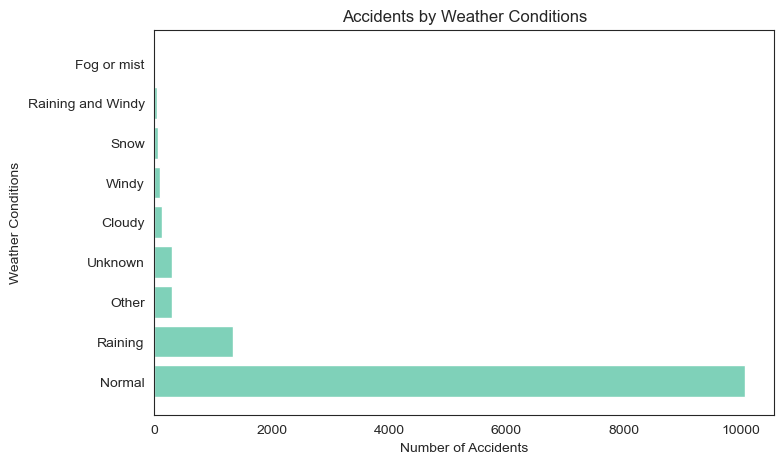

In [23]:
weather_counts = df['Weather_conditions'].value_counts()

plt.figure(figsize=(8,5))
plt.barh(
    weather_counts.index,
    weather_counts.values,
    color="#7FD1B9"
)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Conditions")
plt.show()

Accidents by Road Surface Type

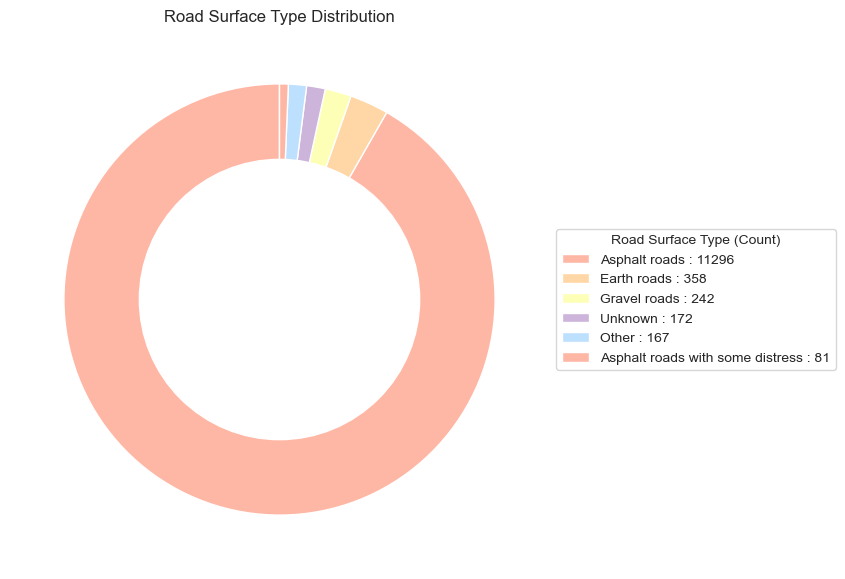

In [21]:
road_counts = df['Road_surface_type'].value_counts()

plt.figure(figsize=(7,7))

wedges, texts = plt.pie(
    road_counts.values,
    startangle=90,
    colors=["#FFB7A5", "#FFD6A5", "#FDFFB6", "#CDB4DB", "#BDE0FE"]
)

centre_circle = plt.Circle((0,0), 0.65, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Road Surface Type Distribution")

legend_labels = [
    f"{label} : {count}"
    for label, count in zip(road_counts.index, road_counts.values)
]

plt.legend(
    wedges,
    legend_labels,
    title="Road Surface Type (Count)",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.show()


Accidents by Time of Day

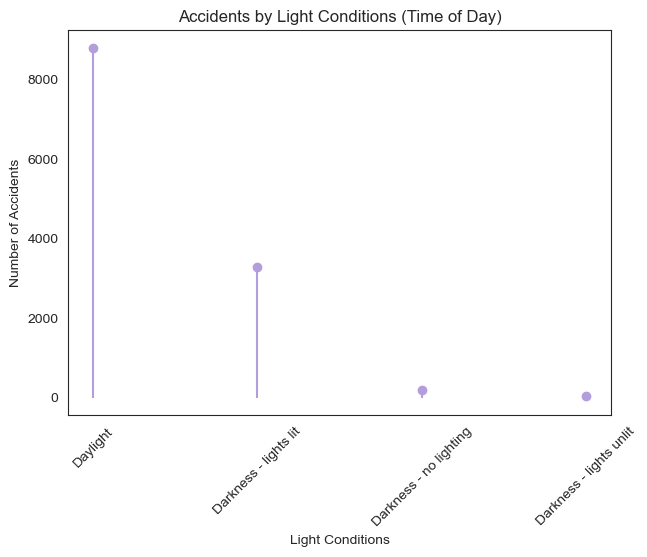

In [24]:
light_counts = df['Light_conditions'].value_counts()

plt.figure(figsize=(7,5))
plt.stem(
    light_counts.index,
    light_counts.values,
    linefmt="#B39DDB",
    markerfmt='o',
    basefmt=" "
)
plt.title("Accidents by Light Conditions (Time of Day)")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

Top Contributing Factors

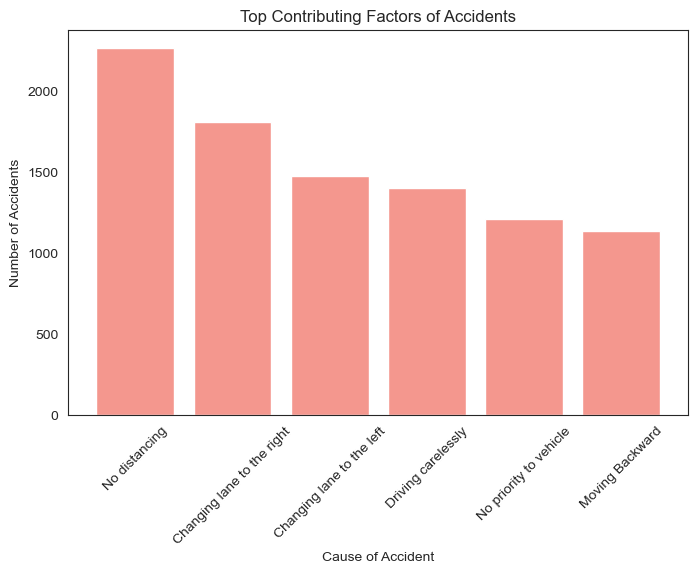

In [27]:
cause_counts = df['Cause_of_accident'].value_counts().head(6)

plt.figure(figsize=(8,5))
plt.bar(
    cause_counts.index,
    cause_counts.values,
    color="#F4978E"
)

plt.title("Top Contributing Factors of Accidents")
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

plt.show()

Accident Severity Distribution

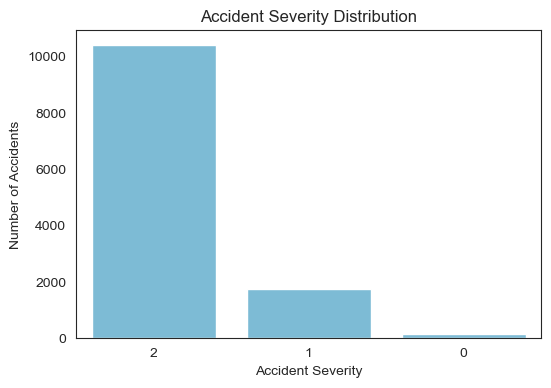

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='Accident_severity',
    order=df['Accident_severity'].value_counts().index,
    color=light_blue
)

plt.title("Accident Severity Distribution")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.show()



### Key Insights
- Most accidents occur under normal and rainy weather conditions.
- Wet and uneven road surfaces show higher accident frequencies.
- Low light and night-time conditions contribute to increased accidents.
- Major contributing factors include speeding and driver negligence.
- Most accidents fall under slight to serious severity categories.
